In [1]:
import os
import glob
import pydicom
import nibabel as nib
import pandas as pd
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import torch
import torch.nn as nn

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from utils.dcm_utils import *
from utils.nii_utils import *

In [2]:
DATA_DIR = "/Volumes/SSD970/"

TRAIN_SEG_DIR = os.path.join(DATA_DIR, "segmentations")
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, "train_images")

In [3]:
patient_id = "1.2.826.0.1.3680043.780"

In [4]:
train_df = pd.read_csv(os.path.join(DATA_DIR, "train_df_with_slices.csv"))

In [5]:
imgs, image_positions, image_orientations, pixel_spacings, slice_thicknesses = read_patient_dcm(train_df, TRAIN_IMAGE_DIR,patient_id)
imgs.shape

(195, 512, 512)

In [6]:
masks = read_patient_nii_mask(patient_id, TRAIN_SEG_DIR)
masks.shape

(195, 512, 512)

In [7]:
height = image_positions[0, 2] - image_positions[1, 2]
pixel_spacing = pixel_spacings[0, 0]
aspect = np.round(height / pixel_spacing)
aspect

3.0

In [8]:
imgs = np.repeat(imgs, aspect, axis=0)
imgs.shape

(585, 512, 512)

In [9]:
masks = np.repeat(masks, aspect, axis=0)
masks.shape

(585, 512, 512)

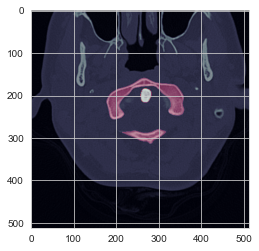

In [13]:
plt.imshow(imgs[200, :, :], cmap='bone')
plt.imshow(masks[200, :, :], alpha=0.4)
plt.show()